In [1]:
import os
import pandas as pd

In [2]:
def ratio_day(serie):
    l = [None]
    for i in range(1, len(serie)):
        l.append(round((serie[i] / serie[i - 1]), 3))

    return l

In [3]:
def substract(serie):
    l = [None]
    for i in range(1, len(serie)):
        l.append(round((serie[i] - serie[i - 1]), 3))

    return l

In [4]:
markers = ["o", "*", "v", "s", "p"]
styles = ["-", "-.", "--", ":", "-"]

In [5]:
path_data = os.path.join("csse_covid_19_data", "csse_covid_19_time_series")
file_data = "time_series_19-covid-Confirmed.csv"

In [6]:
data = (
    pd.read_csv(
        os.path.join(path_data, file_data),
        index_col=["Country/Region", "Province/State", "Lat", "Long"],
    )
    .sort_index()
    .T
)
data.index = pd.to_datetime(data.index)
data = data.round(3)
data.head()

Country/Region Afghanistan   Albania   Algeria   Andorra    Angola  \
Province/State         NaN       NaN       NaN       NaN       NaN   
Lat                33.0000   41.1533   28.0339   42.5063  -11.2027   
Long              65.0000   20.1683   1.6596    1.5218    17.8739    
2020-01-22             0.0       0.0       0.0       0.0       0.0   
2020-01-23             0.0       0.0       0.0       0.0       0.0   
2020-01-24             0.0       0.0       0.0       0.0       0.0   
2020-01-25             0.0       0.0       0.0       0.0       0.0   
2020-01-26             0.0       0.0       0.0       0.0       0.0   

Country/Region Antigua and Barbuda Argentina   Armenia  \
Province/State                 NaN       NaN       NaN   
Lat                        17.0608  -38.4161   40.0691   
Long                     -61.7964  -63.6167   45.0382    
2020-01-22                     0.0       0.0       0.0   
2020-01-23                     0.0       0.0       0.0   
2020-01-24                     0.0       0.0       0.0   
2020-01-25                     0.0       0.0       0.0   
2020-01-26                     0.0       0.0       0.0   

Country/Region                    Australia                        ...  \
Province/State Australian Capital Territory From Diamond Princess  ...   
Lat                                -35.4735               35.4437  ...   
Long                               149.0124              139.6380  ...   
2020-01-22                              0.0                   0.0  ...   
2020-01-23                              0.0                   0.0  ...   
2020-01-24                              0.0                   0.0  ...   
2020-01-25                              0.0                   0.0  ...   
2020-01-26                              0.0                   0.0  ...   

Country/Region United Kingdom                                         Uruguay  \
Province/State      Gibraltar Isle of Man Montserrat United Kingdom       NaN   
Lat                   36.1408     54.2361    16.7425        55.3781  -32.5228   
Long                -5.3536     -4.5481    -62.1874       -3.4360   -55.7658    
2020-01-22                0.0         0.0        0.0            0.0       0.0   
2020-01-23                0.0         0.0        0.0            0.0       0.0   
2020-01-24                0.0         0.0        0.0            0.0       0.0   
2020-01-25                0.0         0.0        0.0            0.0       0.0   
2020-01-26                0.0         0.0        0.0            0.0       0.0   

Country/Region Uzbekistan Venezuela   Vietnam    Zambia  Zimbabwe  
Province/State        NaN       NaN       NaN       NaN       NaN  
Lat               41.3775   6.4238    16.0000  -15.4167  -20.0000  
Long             64.5853  -66.5897   108.0000  28.2833   30.0000   
2020-01-22            0.0       0.0       0.0       0.0       0.0  
2020-01-23            0.0       0.0       2.0       0.0       0.0  
2020-01-24            0.0       0.0       2.0       0.0       0.0  
2020-01-25            0.0       0.0       2.0       0.0       0.0  
2020-01-26            0.0       0.0       2.0       0.0       0.0  

[5 rows x 501 columns]

## Total

In [7]:
confirmed = pd.DataFrame(index=data.index)

In [8]:
confirmed["Total"] = data.sum(axis=1)

In [9]:
confirmed["ratio_tot"] = ratio_day(confirmed["Total"])

In [10]:
confirmed["ratio_diff_tot"] = substract(confirmed["ratio_tot"])

## W/o China

In [11]:
confirmed["Total_wo_China"] = confirmed["Total"] - data.loc[:, "China"].sum(axis=1)

In [12]:
confirmed["ratio_wo_China"] = ratio_day(confirmed["Total_wo_China"])

In [13]:
confirmed["ratio_diff_wo_China"] = substract(confirmed["ratio_wo_China"])

## Canada

In [14]:
confirmed["Total_Can"] = data.loc[:, "Canada"].sum(axis=1)

In [15]:
confirmed["ratio_Can"] = ratio_day(confirmed["Total_Can"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [16]:
confirmed["ratio_diff_Can"] = substract(confirmed["ratio_Can"])

## Quebec

In [17]:
confirmed["Total_Qc"] = data.loc[:, ("Canada", "Quebec")].sum(axis=1)

In [18]:
confirmed["ratio_Qc"] = ratio_day(confirmed["Total_Qc"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [19]:
confirmed["ratio_diff_Qc"] = substract(confirmed["ratio_Qc"])

## France (métropole)

In [20]:
confirmed["Total_Fra"] = data.loc[:, ("France", "France")].sum(axis=1)

In [21]:
confirmed["ratio_Fra"] = ratio_day(confirmed["Total_Fra"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


In [22]:
confirmed["ratio_diff_Fra"] = substract(confirmed["ratio_Fra"])

## Tables

In [23]:
confirmed[["Total", "Total_wo_China", "Total_Can", "Total_Qc", "Total_Fra"]].tail()

,Total,Total_wo_China,Total_Can,Total_Qc,Total_Fra
2020-03-19,242708.0,161552.0,800.0,121.0,10871.0
2020-03-20,272166.0,190916.0,943.0,139.0,12612.0
2020-03-21,304524.0,223219.0,1278.0,181.0,14282.0
2020-03-22,335955.0,254558.0,1465.0,219.0,16018.0
2020-03-23,336004.0,254565.0,1470.0,219.0,16018.0


In [24]:
confirmed[["ratio_tot", "ratio_wo_China", "ratio_Can", "ratio_Qc", "ratio_Fra"]].tail()

,ratio_tot,ratio_wo_China,ratio_Can,ratio_Qc,ratio_Fra
2020-03-19,1.129,1.207,1.218,1.287,1.202
2020-03-20,1.121,1.182,1.179,1.149,1.160
2020-03-21,1.119,1.169,1.355,1.302,1.132
2020-03-22,1.103,1.140,1.146,1.210,1.122
2020-03-23,1.000,1.000,1.003,1.000,1.000


In [25]:
confirmed[
    [
        "ratio_diff_tot",
        "ratio_diff_wo_China",
        "ratio_diff_Can",
        "ratio_diff_Qc",
        "ratio_diff_Fra",
    ]
].tail()

,ratio_diff_tot,ratio_diff_wo_China,ratio_diff_Can,ratio_diff_Qc,ratio_diff_Fra
2020-03-19,0.039,0.054,-0.156,0.017,0.020
2020-03-20,-0.008,-0.025,-0.039,-0.138,-0.042
2020-03-21,-0.002,-0.013,0.176,0.153,-0.028
2020-03-22,-0.016,-0.029,-0.209,-0.092,-0.010
2020-03-23,-0.103,-0.140,-0.143,-0.210,-0.122


## Plots

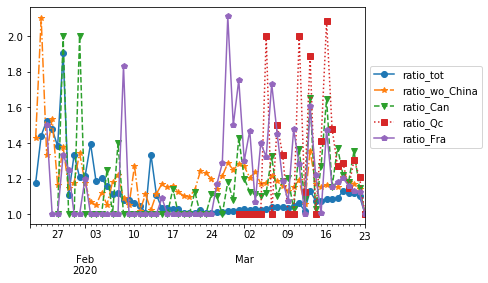

In [26]:
# Ratio
ax_ratio = confirmed[
    ["ratio_tot", "ratio_wo_China", "ratio_Can", "ratio_Qc", "ratio_Fra"]
].plot()
for i, line in enumerate(ax_ratio.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(styles[i])
ax_ratio.legend(bbox_to_anchor=(1, 0.75))

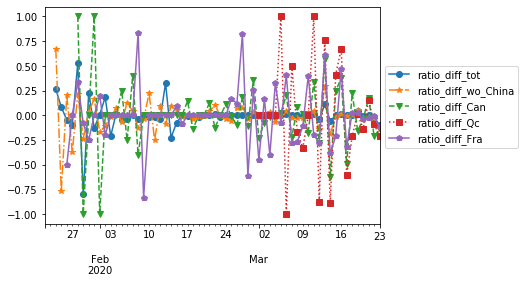

In [27]:
# Ratio diff
ax_ratio = confirmed[
    [
        "ratio_diff_tot",
        "ratio_diff_wo_China",
        "ratio_diff_Can",
        "ratio_diff_Qc",
        "ratio_diff_Fra",
    ]
].plot()
for i, line in enumerate(ax_ratio.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(styles[i])
ax_ratio.legend(bbox_to_anchor=(1, 0.75))

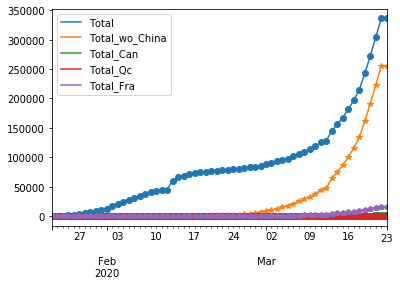

In [28]:
# Cases
ax_total = confirmed[
    ["Total", "Total_wo_China", "Total_Can", "Total_Qc", "Total_Fra"]
].plot()
for i, line in enumerate(ax_total.get_lines()):
    line.set_marker(markers[i])